Chapter 22  
# 和给定椭圆相切的一组矩形
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.patches import Rectangle
from matplotlib.transforms import Affine2D
from matplotlib.pyplot import cm

import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 定义函数

In [5]:
def Mahal_d(Mu, Sigma, x):
  
    x_demeaned = x - Mu
    inv_covmat = np.linalg.inv(Sigma)
    left = np.dot(x_demeaned, inv_covmat)
    mahal = np.dot(left, x_demeaned.T)
    return np.sqrt(mahal).diagonal()

# 参考：
# https://mathworld.wolfram.com/Ellipse.html

### 产生数据

In [6]:
x1 = np.linspace(-5,5,201)
x2 = np.linspace(-5,5,201)

xx1,xx2 = np.meshgrid(x1,x2)

x_array = np.vstack([xx1.ravel(),xx2.ravel()]).T

Mu = np.array([[0],
               [0]]).T

Sigma = np.array([[1,0.5],
                  [0.5,1]])

total_variance = np.diag(Sigma).sum()

x_array = np.vstack([xx1.ravel(),xx2.ravel()]).T

Mu = np.array([[0],
               [0]]).T


d_array = Mahal_d(Mu, Sigma, x_array)
# 计算网格散点的马氏距离

d_array = d_array.reshape(xx1.shape)
# 让马氏距离数据形状等同于 xx1

C:\Users\james\AppData\Local\Temp\ipykernel_9512\188763118.py:7: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(mahal).diagonal()


### 分析椭圆

In [7]:
Lambdas, V_sigma = np.linalg.eig(Sigma)
# 利用特征值分解获得椭圆

alpha = np.arctan(V_sigma[1,0]/V_sigma[0,0])

major_semi = np.sqrt(Lambdas[0])
minor_semi = np.sqrt(Lambdas[1])
# 椭圆的半长轴、半短轴长度


theta_array = np.linspace(0, np.pi/2, 90)

contour_x = (major_semi*np.cos(theta_array)*np.cos(alpha) - 
             minor_semi*np.sin(theta_array)*np.sin(alpha)) 

contour_y = (major_semi*np.cos(theta_array)*np.sin(alpha) + 
             minor_semi*np.sin(theta_array)*np.cos(alpha)) 

# 旋转椭圆的极坐标 (contour_x, contour_y)

### 可视化

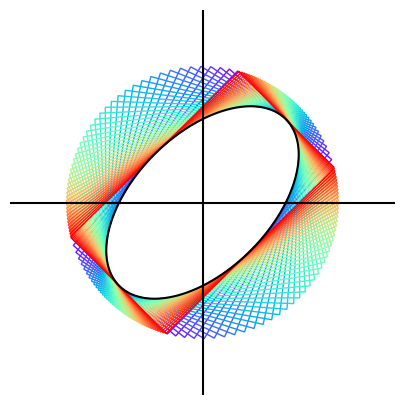

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.contour(xx1, xx2, d_array, levels = [1], colors = 'k')
# 绘制马氏距离为 1 的椭圆
contour_array = np.column_stack((contour_x,contour_y))
# 构造椭圆上点的数组

inv_covmat = np.linalg.inv(Sigma)
# 计算Sigma的逆矩阵

step_size = 2
# 每隔一个点画一个矩形

loop_array = np.arange(0, contour_array.shape[0], step_size)

colors = cm.rainbow(np.linspace(0, 1, len(loop_array))) # rainbow

for idx, c_idx in zip(loop_array, colors):
    
    x_idx = contour_array[idx,:].reshape(-1,1)

    v_idx = inv_covmat @ x_idx
    
    v_idx = v_idx/np.linalg.norm(v_idx)
    # print(np.linalg.norm(v_idx))
    
    theta = np.arctan(v_idx[1]/v_idx[0])
    
    theta = theta*180/np.pi
    # 矩形的旋转角度
    
    d1_idx_sq = v_idx.T @ Sigma @ v_idx
    
    d1_idx = np.sqrt(d1_idx_sq)
    
    d2_idx_sq = total_variance - d1_idx_sq
    
    d2_idx = np.sqrt(d2_idx_sq)
    
    rect = Rectangle([-d1_idx, -d2_idx] , # 矩形的位置
                     width = 2*d1_idx,  # 矩形的宽
                     height = 2*d2_idx, # 矩形的长
                     edgecolor = c_idx,facecolor="none",
                     transform=Affine2D().rotate_deg_around(*(0,0), theta)+ax.transData)
    # 矩形仿射变换

    ax.add_patch(rect)
    
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

ax.axhline(0, color = 'k')
ax.axvline(0, color = 'k')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_aspect('equal', adjustable='box')
ax.axis('off')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.savefig('Figures/和给定椭圆相切的一组矩形.svg', format='svg')

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023